# Image Classification using Keras

In [1]:
import os; os.environ["TF_KERAS"]='1'

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2
import tensorflow.compat.v1 as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0' ## 초기화할 GPU number
tf.disable_v2_behavior()
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from PIL import Image
import pandas as pd
from tensorflow_addons.optimizers import AdamW
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings('ignore')

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# print(keras.__version__)

In [4]:
image_gen = ImageDataGenerator(rotation_range=25,
                              width_shift_range=0.1,
                              height_shift_range=0.1,rescale=1/255,shear_range=0.2,
                              zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [5]:
path = "wafer/dataset/class/abnormal_form_donut/abnormal_form_donut_2.bmp"

In [6]:
def display_img(path):
    plt.figure(figsize=(2,2))
    read = cv2.imread(path)
    # read_cvt = cv2.cvtColor(read ,cv2.COLOR_BGR2RGB)
    # read_cvt = cv2.cvtColor(read)
    print(read.shape)
    plt.imshow(read)
    plt.show()

(100, 100, 3)


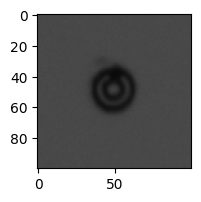

In [7]:
display_img(path)

In [8]:
image_gen.flow_from_directory("wafer/dataset/class")

Found 26370 images belonging to 8 classes.


In [9]:
model = Sequential()

In [10]:
# Convolutional Layer 1
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(100, 100, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Layer 2
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Layer 3
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Layer 4
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layers
model.add(Flatten())

model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(8, activation='softmax'))

# AdamW 옵티마이저 설정
optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 256)       2

In [12]:
training_image =image_gen.flow_from_directory("wafer/dataset/class" , 
                                              target_size=(100,100),batch_size=25,
                                              color_mode='grayscale')

Found 26370 images belonging to 8 classes.


In [13]:
testing_image =image_gen.flow_from_directory("wafer/dataset/consistency" , 
                                              target_size=(100,100),batch_size=25,
                                              color_mode='grayscale')

Found 1321 images belonging to 8 classes.


In [14]:
steps_per_epoch = 26370//32
validation_steps =26370//32

from tensorflow.keras.callbacks import ModelCheckpoint

filename = 'model/checkpoint-epoch-{epoch:02d}-val_acc-{val_acc:.4f}.h5'
model_checkpoint = ModelCheckpoint(filename, save_best_only=True, monitor='val_acc', mode='max',verbose=0)

history = model.fit_generator(generator=training_image,
                              steps_per_epoch=steps_per_epoch,
                              epochs=100,
                              validation_data=testing_image,
                              validation_steps=validation_steps,
                              callbacks=[model_checkpoint])

Epoch 1/100
824/824 [==============================] - 35s 34ms/step - batch: 411.5000 - size: 24.9939 - loss: 7.5185 - acc: 0.6949 - val_loss: 4.8512 - val_acc: 0.3377
Epoch 2/100
824/824 [==============================] - 29s 35ms/step - batch: 411.5000 - size: 24.9939 - loss: 2.6189 - acc: 0.8084 - val_loss: 5.9238 - val_acc: 0.3015
Epoch 3/100
824/824 [==============================] - 27s 33ms/step - batch: 411.5000 - size: 25.0000 - loss: 2.2741 - acc: 0.8344 - val_loss: 4.6593 - val_acc: 0.4292
Epoch 4/100
824/824 [==============================] - 29s 36ms/step - batch: 411.5000 - size: 24.9939 - loss: 1.8985 - acc: 0.8480 - val_loss: 3.4285 - val_acc: 0.3312
Epoch 5/100
824/824 [==============================] - 31s 38ms/step - batch: 411.5000 - size: 24.9939 - loss: 1.5525 - acc: 0.8656 - val_loss: 2.9407 - val_acc: 0.4425
Epoch 6/100
824/824 [==============================] - 31s 38ms/step - batch: 411.5000 - size: 25.0000 - loss: 1.2416 - acc: 0.8777 - val_loss: 4.8269 - va

KeyboardInterrupt: 

In [ ]:
model.save("AdamW.h5")
pd.options.display.float_format = '{:7f}'.format

In [ ]:
# def processing(path):
#     img = cv2.imread(path)
#     print(img.shape)
#     plt.imshow(img)
#     test1_proc = image.load_img(path , target_size=(100,100))
#     test1_proc_1 = image.img_to_array(test1_proc)
#     t1 = np.expand_dims(test1_proc ,axis=0)
#     t1 = t1/255
#     pred_classes = model.predict(t1)
#     pred = np.argmax(pred_classes ,axis=1)

#     plt.subplot(121)
#     pic = Image.open(path) 
#     plt.xlabel("Original Image")
#     plt.imshow(pic)
    
    
#     plt.subplot(122)
    
#     s1 = pd.Series(pred_classes.ravel() , index = training_image.class_indices.keys())
#     s1.plot(kind = 'barh' ,figsize = (10,5),color='green')
#     plt.xlabel("prediction")
#     plt.tight_layout()
#     plt.show()

#     for i in training_image.class_indices:
#         if pred == training_image.class_indices[i]:
#             print("prediction made by model is :" ,i)
            
            
    
    
#     print(s1)
#     print(type(s1))


In [ ]:
def processing(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = np.expand_dims(img, axis=-1)  # 이미지 데이터에 채널 차원 추가

    # plt.imshow(img, cmap='gray')

    test1_proc = image.load_img(path, color_mode='grayscale', target_size=(100, 100))
    test1_proc_1 = image.img_to_array(test1_proc)
    t1 = np.expand_dims(test1_proc_1, axis=0)
    t1 = t1 / 255
    pred_classes = model.predict(t1)
    pred = np.argmax(pred_classes, axis=1)

    original_label = os.path.basename(os.path.dirname(path))
    
    # plt.subplot(121)
    # pic = Image.open(path)
    # plt.xlabel("Original Image : " + original_label)
    # # plt.imshow(pic, cmap='jet')
    # color='deepskyblue'
    # plt.subplot(122)
    # s1 = pd.Series(pred_classes.ravel(), index=training_image.class_indices.keys())
    # s1.plot(kind='barh', figsize=(10, 5), color=color)
    # a1=s1.plot(kind='barh', figsize=(10, 5), color=color)

    # for p in a1.patches:
    #     left, bottom, width, height = p.get_bbox().bounds
    #     percentage = width * 100
    #     if percentage > 0.2:  # 그래프 수치가 0보다 클 때만 표시
    #         a1.annotate("%.1f" % percentage, xy=(left + width / 2, bottom + height / 2), ha='center', va='center')


    # plt.xlabel("prediction")
    # plt.tight_layout()
    # plt.show()

    predicted_label = list(training_image.class_indices.keys())[pred[0]]



    # for i in training_image.class_indices:
    #     if pred == training_image.class_indices[i]:
    #         print("prediction made by model is:", i)

    # print(s1)
    # print(type(s1))
    
    return predicted_label


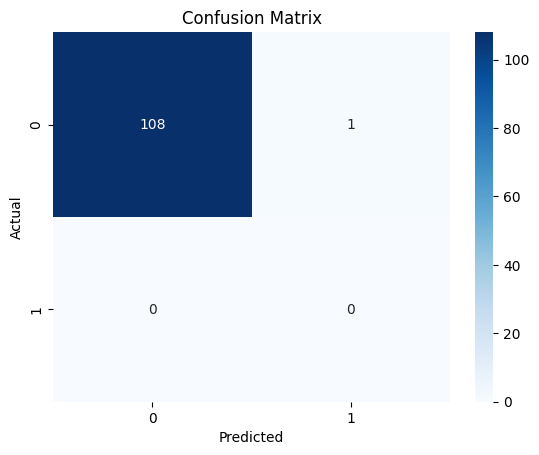

Accuracy: 99.08%
Classification Report:
                           precision    recall  f1-score   support

      abnormal_form_donut       0.00      0.00      0.00         0
       abnormal_form_hump       1.00      0.99      1.00       109
abnormal_form_shape_error       0.00      0.00      0.00         0
   foreign_material_fixed       0.00      0.00      0.00         0
foreign_material_floating       0.00      0.00      0.00         0
              non_through       0.00      0.00      0.00         0
                  scratch       0.00      0.00      0.00         0
              unprocessed       0.00      0.00      0.00         0

                micro avg       0.99      0.99      0.99       109
                macro avg       0.12      0.12      0.12       109
             weighted avg       1.00      0.99      1.00       109



In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
def evaluate_model(image_folder):
    # 폴더 내의 이미지 파일 목록 획득
    image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    total_images = len(image_files)
    match_count = 0
    y_true = []  # 정답 레이블
    y_pred = []  # 모델의 예측 레이블

    # 이미지 평가
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        original_label = os.path.basename(os.path.dirname(image_path))

        predicted_label = processing(image_path)

        # 정답 레이블 및 모델의 예측 레이블 추가
        y_true.append(original_label)
        y_pred.append(predicted_label)

        if original_label == predicted_label:
            match_count += 1

    accuracy_percentage = (match_count / total_images) * 100

    # 혼동 행렬 계산
    cm = confusion_matrix(y_true, y_pred)
    
    # 혼동 행렬을 시각화하여 출력 (선택 사항)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    class_names = list(training_image.class_indices.keys())

    # 정밀도, 재현율, F1 점수, 지원도 계산
    classification_rep = classification_report(y_true, y_pred, target_names=class_names,labels=class_names)
    
    # 정확도 출력
    print(f"Accuracy: {accuracy_percentage:.2f}%")

    # 분류 보고서 출력
    print("Classification Report:")
    print(classification_rep)

# 모델 성능 평가를 실행할 폴더 설정
image_folder = "wafer/dataset/consistency/abnormal_form_hump/"

# 모델 평가 실행
evaluate_model(image_folder)

In [ ]:
processing("wafer/dataset/consistency/unprocessed/non_through_220.bmp")

'unprocessed'

In [ ]:
# processing("wafer/dataset/consistency/foreign_material_floating/2_15287.bmp")

In [ ]:
# processing("wafer/dataset/consistency/abnormal_form_shape_error/abnormal_form_shape_error_2037.bmp")


In [ ]:
# processing("wafer/dataset/consistency/abnormal_form_hump/abnormal_form_hump_3518.bmp")

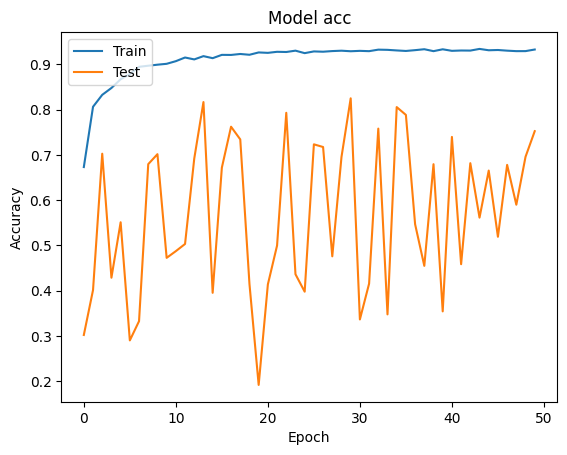

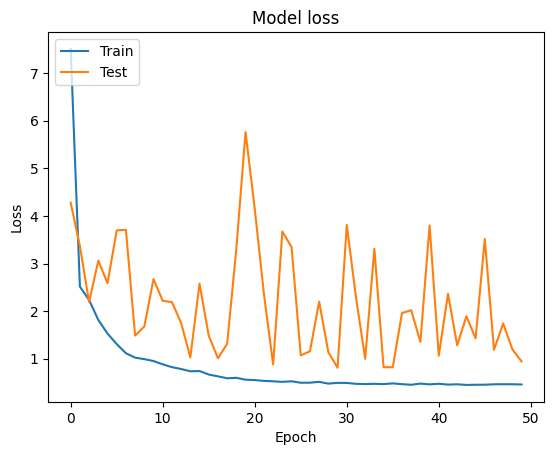

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#원래 코드

import os
import random

# 디렉토리에서 무작위로 폴더 선택
validation_data_dir = 'wafercopy/dataset/consistency'  # 검증 데이터 폴더의 경로로 변경
selected_folder = random.choice(os.listdir(validation_data_dir))
folder_path = os.path.join(validation_data_dir, selected_folder)
print(folder_path)

# 폴더에서 모든 이미지 파일 가져오기
image_files = [f for f in os.listdir(folder_path) if f.endswith(".bmp")]

# 100개의 이미지를 무작위로 선택
selected_images = random.sample(image_files, 10)

# 선택한 이미지들을 처리하고 예측하기
correct_predictions = 0

for image_file in selected_images:
    image_path = os.path.join(folder_path, image_file)
    
    # 예측 실행
    processing(image_path)  # 이미지 처리 및 예측

    # 원래 레이블과 비교
    original_label = os.path.basename(selected_folder)
    predicted_label =  processing(image_path)
    
    if original_label == predicted_label:
        correct_predictions += 1

# 일치 비율 계산
total_images = len(selected_images)
accuracy = (correct_predictions / total_images) * 100
print(f"원래 레이블과 일치하는 이미지 수: {correct_predictions}/{total_images}")
print(f"일치 비율: {accuracy:.2f}%")

wafercopy/dataset/consistency\abnormal_form_donut
원래 레이블과 일치하는 이미지 수: 10/10
일치 비율: 100.00%


In [ ]:
# import os
# import random

# # 디렉토리에서 무작위로 폴더 선택
# validation_data_dir = 'wafercopy/dataset/consistency'  # 검증 데이터 폴더의 경로로 변경
# selected_folder = random.choice(os.listdir(validation_data_dir))
# folder_path = os.path.join(validation_data_dir, selected_folder)
# print(folder_path)


# validation_data_dir = 'wafercopy/dataset/consistency'  # 검증 데이터 폴더의 경로로 변경
# folders = os.listdir(validation_data_dir)

# for selected_folder in folders:
#     folder_path = os.path.join(validation_data_dir, selected_folder)
#     print(folder_path)

# # 폴더에서 모든 이미지 파일 가져오기
# image_files = [f for f in os.listdir(folder_path) if f.endswith(".bmp")]

# # 100개의 이미지를 무작위로 선택
# selected_images = random.sample(image_files, 100)

# # 선택한 이미지들을 처리하고 예측하기
# correct_predictions = 0


# for image_file in selected_images:
#     image_path = os.path.join(folder_path, image_file)
    
#     # 예측 실행
#     processing(image_path)  # 이미지 처리 및 예측
    
#     # 원래 레이블과 비교
#     original_label = os.path.basename(selected_folder)
#     predicted_label =  processing(image_path)
    
#     if original_label == predicted_label:
#         correct_predictions += 1

# # 일치 비율 계산
# total_images = len(selected_images)
# accuracy = (correct_predictions / total_images) * 100
# print(f"원래 레이블과 일치하는 이미지 수: {correct_predictions}/{total_images}")
# print(f"일치 비율: {accuracy:.2f}%")
